## Plot QNM Frequencies under different scenarios to demonstrate Conventions and Properties.
---
#### Summary: ...
---

In [7]:
# Define which base QNM to use. Note that the same QNM with m --> -m may be used at some point.
l,m,n = 2,1,0

# Useful to development: turn module reloading
%load_ext autoreload
# Inline plotting
%matplotlib inline
# Force module recompile
%autoreload 2

# Import kerr and numpy
from kerr import leaver
from kerr.formula.zdqnm_frequencies import kappa
from numpy import linspace,array,sin,pi,zeros,arange,ones
from numpy.linalg import norm
from kerr.basics import rgb

# Setup plotting backend
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import *
import matplotlib.pyplot as my
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.labelsize'] = 20

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
#from kerr.formula.zdqnm_sepconstants import SC as scfit

### Plot Single QNM Frequency on jf = [-1,1] using tabulated data

In [9]:
# Define a function to plot the real and imaginary parts of the complex frequency given l,m,n. 
# Defining this function will save save time/code later.
def plot_mode(l,m,n,linestyle='-',conj=None):
    
    if conj is not None:
        x_,wc_,sc_ = conj
        # %%%%%%%%%%%%%%%%%%%%%%%%%%% #
        # APPLY SYMMETRY RELATIONSHIP #
        # FOR m --> -1*m              #
        # %%%%%%%%%%%%%%%%%%%%%%%%%%% #
        wc_ = -wc_.conj()
        sc_ = sc_.conj()
        
    jf_range = 0.99* sin( 0.5*pi * linspace(-1,1,101) )
    wc = zeros(jf_range.shape).astype(complex)
    sc = zeros(jf_range.shape).astype(complex)
    for k,jf in enumerate(jf_range):
        wc[k],sc[k] = leaver(jf,l,m,n)

    fig = figure( figsize=9*array([1,1]) )
    grey = 0.8*array([1,1,1])
    
    ax = [0,0,0,0]

    #x = jf_range 
    x = kappa([jf_range,l,m]) 
    jfzeroline = lambda : axvline( x[jf_range==min(abs(jf_range))], linestyle='--', color=grey )

    ax[0]=subplot(2,2,1); jfzeroline()
    if conj is not None:
        plot( x_, wc_.real, color=grey, linewidth=4 )
    plot( x, wc.real, linestyle )
    # xlabel(r'$\kappa_{%i%i}(j_f)$'%(l,m))
    ylabel(r'$\mathrm{Re}\,\tilde{\omega}_{%i%i%i}$' % (l,m,n) )

    ax[1]=subplot(2,2,2); jfzeroline()
    gca().yaxis.set_label_position("right"); gca().yaxis.tick_right()
    if conj is not None:
        plot( x_, wc_.imag, color=grey, linewidth=4 )
    plot( x, wc.imag, linestyle )
    # xlabel(r'$\kappa_{%i%i}(j_f)$'%(l,m))
    ylabel(r'$\mathrm{Im}\,\tilde{\omega}_{%i%i%i}$' % (l,m,n) )

    ax[2]=subplot(2,2,3); jfzeroline()
    if conj is not None:
        plot( x_, sc_.real, color=grey, linewidth=4 )
    #plot( x, scfit[(l,m,n)](jf_range).real, color=0*grey, linestyle='--', alpha=0.1, linewidth=6 )
    plot( x, sc.real, 'm'+linestyle )
    xlabel(r'$\kappa_{%i%i}(j_f)$'%(l,m))
    ylabel(r'$\mathrm{Re}\,\tilde{K}_{%i%i%i}$' % (l,m,n) )

    ax[3]=subplot(2,2,4); jfzeroline()
    gca().yaxis.set_label_position("right"); gca().yaxis.tick_right()
    if conj is not None:
        plot( x_, sc_.imag, color=grey, linewidth=4 )
    #plot( x, -scfit[(l,m,n)](jf_range).imag, color=0*grey, linestyle='--', alpha=0.1, linewidth=6 )
    plot( x, sc.imag, 'm'+linestyle )
    xlabel(r'$\kappa_{%i%i}(j_f)$'%(l,m))
    ylabel(r'$\mathrm{Im}\,\tilde{K}_{%i%i%i}$' % (l,m,n) )
    
    show()
    
    #
    return x,wc,sc
    

### Plot the single QNM 

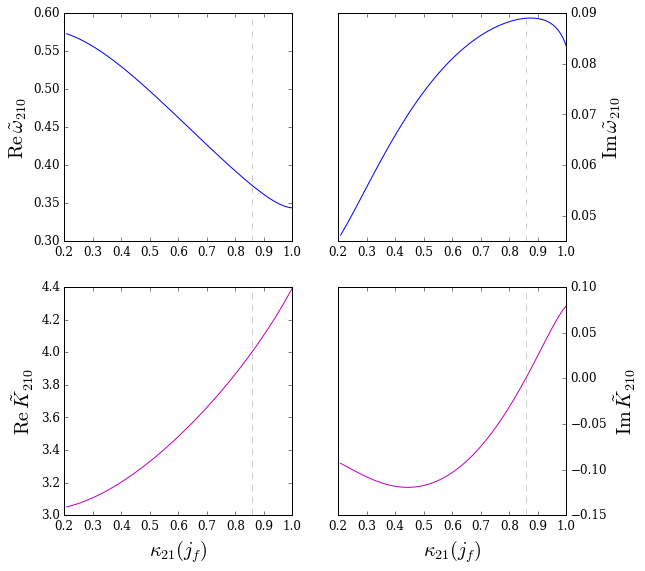

In [10]:
# Plot the desired QNM
x,wc,sc = plot_mode(l,m,n)

### Plot -m on separate figure for comparison

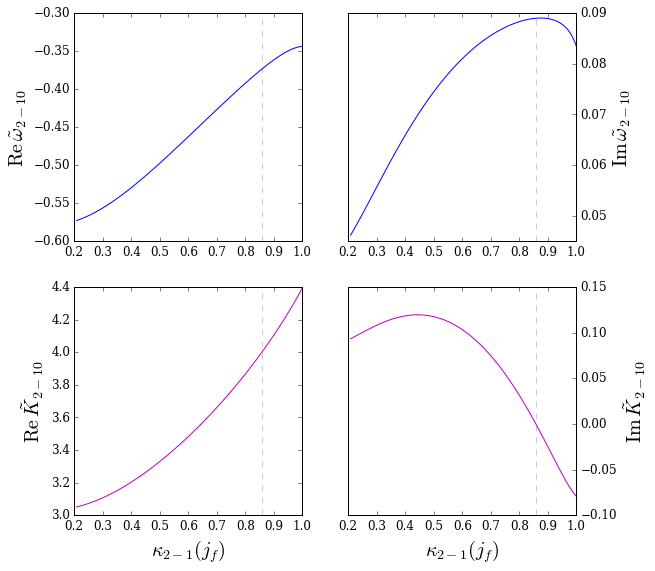

In [11]:
plot_mode(l,-m,n);

### Demonstrate Symmetry Property by plotting two QNMs that differ only by the sign of m

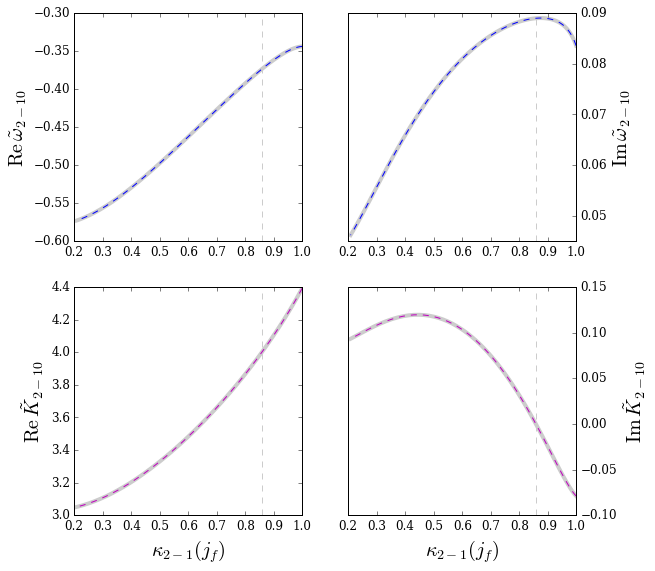

In [12]:
#
plot_mode(l,-m,n,linestyle='--',conj=(x,wc,sc));

### But note that coincident solutions correspond to pairs: (jf,l,m,n) and (-jf,l,-m,n)

/Library/Python/2.7/site-packages/matplotlib/lines.py:1106: UnicodeWarning: Unicode unequal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if self._markerfacecolor != fc:
/Library/Python/2.7/site-packages/matplotlib/lines.py:1082: UnicodeWarning: Unicode unequal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if self._markeredgecolor != ec:


0.499494465758


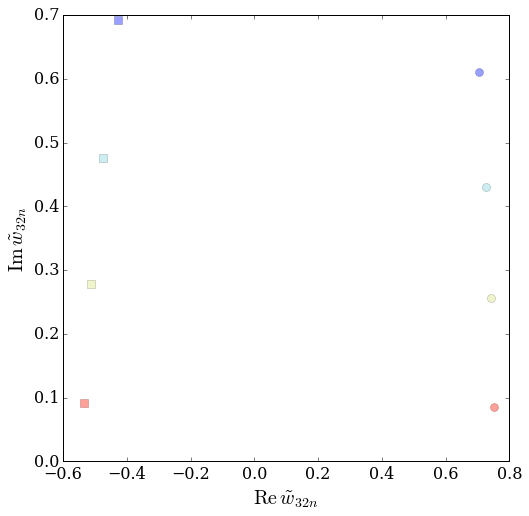

In [7]:
# Inline plotting
#%matplotlib inline
#%matplotlib notebook
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.labelsize'] = 20

#
jf = 0.68
n_range = arange(4)

#
wc = zeros(n_range.shape).astype(complex)
sc = zeros(n_range.shape).astype(complex)
wc_= zeros(n_range.shape).astype(complex)
sc_= zeros(n_range.shape).astype(complex)
for k,n in enumerate(n_range):
    wc[k] ,sc[k]  = leaver( jf,l, m,n )
    wc_[k],sc_[k] = leaver(-jf,l,-m,n )
    
fig = figure( figsize=8*array([1,1]) )
ms = 8; clr = rgb(n_range.size,jet=True)

for k in range( len(n_range) ):
    plot( wc[k].real, wc[k].imag, 'o', ms=ms, mec=0.3*clr[k], mfc=clr[k], alpha=0.4 )
    #plot(-wc[k].real, wc[k].imag, 'ok', ms=ms, alpha=0.4, mfc='none' )
for k in range( len(n_range) ):
    plot( wc_[k].real, wc_[k].imag, 's', ms=ms, mec=0.3*clr[k], mfc=clr[k], alpha=0.4 )
    #plot(-wc_[k].real, wc_[k].imag, 'xk', ms=ms, alpha=0.4, mfc='none' )
    
# Label axes
xlabel(r'$\mathrm{Re}\,\tilde{w}_{%i%in}$' % (l,m) )  
ylabel(r'$\mathrm{Im}\,\tilde{w}_{%i%in}$' % (l,m) )    

print norm(wc+wc_.conj())

### But what do I mean by coincident solutions?? When solving leaver's equations for a given l and m, there are *both* positive and neagtive frequency solutions. Let's try to visualize this.

[[ 10.4311124   10.42996458  10.43168786  10.44495738]
 [  9.21361115   9.23501079   9.27701652   9.33815918]]


ValueError: x and y should both be 1-D arrays

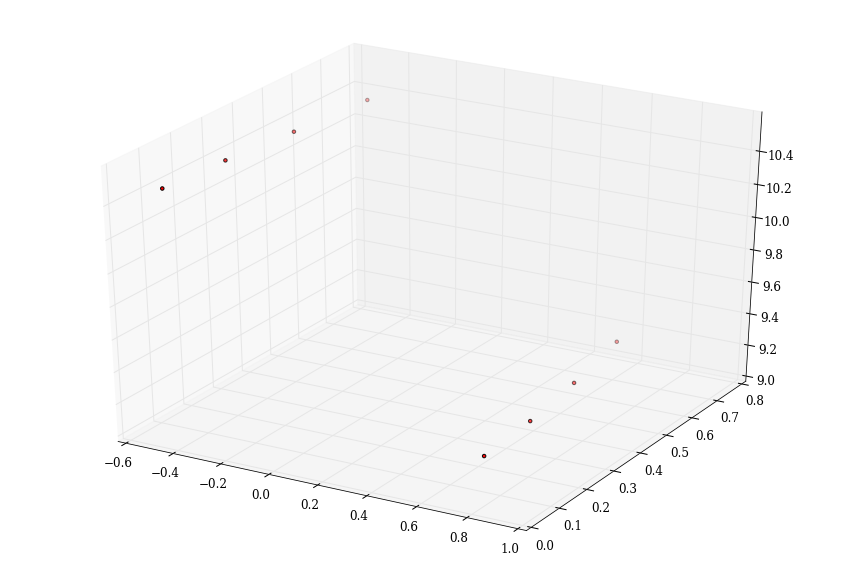

In [19]:
# First, let's interpolate the separation constants. This will help a lot with plotting.

# This requires interp2d
import scipy.interpolate as intpl
interp2d = intpl.interp2d
from numpy import hstack,vstack
from numpy import meshgrid
from matplotlib import cm

fig = figure( figsize=(15,10) )
ax = fig.add_subplot(111, projection='3d')

x = vstack( [wc_.real,wc.real] )
y = vstack( [wc_.imag,wc.imag] )
z = vstack( [sc_.real,sc.real] )
SCR = interp2d(x,y,z)

gca().scatter( x,y,z, c='r', marker='o',s=12)

print z

# Create grid
x_range = linspace( min(x.reshape(x.size,)), max(x.reshape(x.size,)) )
y_range = linspace( min(y.reshape(y.size,)), max(y.reshape(y.size,)) )
xx,yy = meshgrid(x_range,y_range)
zz = SCR(xx,yy)
gca().plot_surface(x_range,y_range,zz,cmap=cm.coolwarm,linewidth=0)
